# Classless automated data cleaning for chest Xrays with cleanX: example code without using classes
Work by Candace Makeda Moore, MD, Oleg Sivokon, Andrew Murphy 
Please note this workflow does not cover the whole scope of cleanX, and is only meant to show some of the functionality that can be accomplished without using the classes in cleanX. It is essentially a workflow that data analysts and others who do not program at a professional level can follow. A Jupyter based widget and workflow generated by CleanX classes are in other files.  It includes a workflow after JPEGS have been extracted and csvs were made from dataset information. Functions to extract JPEGs using simpleitk or pydicom are in the code of cleanX in the cleanX.dicom_processing module. This module also contains classes which can aid in creating csv files from sets of dicoms, but is not covered in this particular workflow demo.  

## Where the dataset this runs on came from:

To demo this potential workflow we used the CoronaHack -Chest X-Ray-Dataset from Kaggle. The dataset was assembled by Praveen Govindaraj. 


## Libraries and environments

Import libraries:

In [1]:
# get the very latest cleanX off the github!
## DANGER (and this would actually need to get the develop branch instead...)
#!pip uninstall -y cleanX
#!pip install git+https://github.com/drcandacemakedamoore/cleanX.git


In [2]:
# # here is a block in case you have a different branch version downloaded
# import sys
# sys.path = ['D:/projects/cleanX'] + sys.path

In [3]:
# libraries
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os 

import shutil
import PIL
from PIL import Image, ImageOps

from cleanX import dataset_processing as cxcsv
#from cleanX import dicom_processing as cxdcm
from cleanX import image_work as cximg

Expose original author environment:

Expose original author environment:
This cell is a locked cell with my environment when this notebook was created:
System Platform: Windows 10
Packages:
absl-py @ file:///D:/bld/absl-py_1606235631785/work
aiohttp @ file:///D:/bld/aiohttp_1610358782056/work
argon2-cffi @ file:///D:/bld/argon2-cffi_1605217174718/work
astor @ file:///home/conda/feedstock_root/build_artifacts/astor_1593610464257/work
astunparse @ file:///home/conda/feedstock_root/build_artifacts/astunparse_1610696312422/work
async-generator==1.10
async-timeout==3.0.1
atomicwrites==1.4.0
attrs @ file:///home/conda/feedstock_root/build_artifacts/attrs_1605083924122/work
backcall @ file:///home/conda/feedstock_root/build_artifacts/backcall_1592338393461/work
backports.functools-lru-cache==1.6.1
beautifulsoup4 @ file:///home/linux1/recipes/ci/beautifulsoup4_1610988766420/work
bleach @ file:///home/conda/feedstock_root/build_artifacts/bleach_1611678357911/work
blinker==1.4
Bottleneck @ file:///D:/bld/bottleneck_1611195784589/work
cachetools @ file:///home/conda/feedstock_root/build_artifacts/cachetools_1611555765219/work
certifi==2020.12.5
cffi @ file:///D:/bld/cffi_1606601427219/work
chardet @ file:///D:/bld/chardet_1602255574834/work
cleanx==0.1.3
click==7.1.2
cmarkgfm==0.4.2
colorama @ file:///home/conda/feedstock_root/build_artifacts/colorama_1602866480661/work
conda==4.10.1
conda-build==3.21.4
conda-package-handling @ file:///C:/ci/conda-package-handling_1603018162806/work
covid-model-seiir-pipeline==0.1.0
covid-shared==1.0.47
cryptography @ file:///D:/bld/cryptography_1610338853236/work
cycler==0.10.0
decorator==4.4.2
defusedxml==0.6.0
dill @ file:///tmp/build/80754af9/dill_1605066453875/work
docutils==0.16
entrypoints @ file:///home/conda/feedstock_root/build_artifacts/entrypoints_1605121927639/work/dist/entrypoints-0.3-py2.py3-none-any.whl
filelock @ file:///home/linux1/recipes/ci/filelock_1610993975404/work
future==0.18.2
gast==0.3.3
glob2 @ file:///home/linux1/recipes/ci/glob2_1610991677669/work
google-auth @ file:///home/conda/feedstock_root/build_artifacts/google-auth_1608136875028/work
google-auth-oauthlib==0.4.1
google-pasta==0.2.0
googleapis-common-protos @ file:///C:/ci/googleapis-common-protos-feedstock_1600455733359/work
grpcio @ file:///D:/bld/grpcio_1610588756173/work
h5py @ file:///D:/bld/h5py_1602551956383/work
idna @ file:///home/conda/feedstock_root/build_artifacts/idna_1593328102638/work
importlib-metadata==3.10.1
iniconfig==1.1.1
ipykernel @ file:///C:/ci/ipykernel_1596208728219/work/dist/ipykernel-5.3.4-py3-none-any.whl
ipython==7.0.1
ipython-genutils==0.2.0
ipywidgets @ file:///tmp/build/80754af9/ipywidgets_1610481889018/work
jedi==0.17.0
Jinja2==2.11.2
joblib @ file:///tmp/build/80754af9/joblib_1607970656719/work
jsonschema @ file:///home/conda/feedstock_root/build_artifacts/jsonschema_1602551949684/work
jupyter==1.0.0
jupyter-client @ file:///home/conda/feedstock_root/build_artifacts/jupyter_client_1610375432619/work
jupyter-console @ file:///tmp/build/80754af9/jupyter_console_1598884538475/work
jupyter-core @ file:///D:/bld/jupyter_core_1611181888391/work
jupyterlab-pygments @ file:///home/conda/feedstock_root/build_artifacts/jupyterlab_pygments_1601375948261/work
jupyterlab-widgets @ file:///home/conda/feedstock_root/build_artifacts/jupyterlab_widgets_1609173350931/work
jupyterthemes==0.20.0
kaggle @ file:///D:/bld/kaggle_1606754824909/work
Keras==2.3.1
Keras-Applications==1.0.8
Keras-Preprocessing @ file:///home/conda/feedstock_root/build_artifacts/keras-preprocessing_1610713559828/work
keyring==23.0.1
kiwisolver @ file:///D:/bld/kiwisolver_1610099949969/work
lesscpy==0.14.0
libarchive-c @ file:///tmp/build/80754af9/python-libarchive-c_1617780486945/work
loguru==0.5.3
makedalytics==0.0.7
Markdown @ file:///home/conda/feedstock_root/build_artifacts/markdown_1603668500820/work
MarkupSafe @ file:///D:/bld/markupsafe_1610127696479/work
matplotlib @ file:///D:/bld/matplotlib-suite_1605180495775/work
menuinst==1.4.16
mistune @ file:///D:/bld/mistune_1610113018274/work
mkl-fft==1.2.0
mkl-random==1.2.0
mkl-service==2.3.0
multidict @ file:///D:/bld/multidict_1610319180953/work
navigator-updater==0.2.1
nbclient @ file:///home/conda/feedstock_root/build_artifacts/nbclient_1602859080374/work
nbconvert @ file:///D:/bld/nbconvert_1605401997174/work
nbformat @ file:///home/conda/feedstock_root/build_artifacts/nbformat_1611005694671/work
nest-asyncio @ file:///home/conda/feedstock_root/build_artifacts/nest-asyncio_1605195931949/work
notebook @ file:///C:/ci/notebook_1611348264852/work
numexpr @ file:///D:/bld/numexpr_1609341488919/work
numpy @ file:///D:/bld/numpy_1610324712085/work
oauthlib==3.0.1
odeopt==0.1.2
olefile @ file:///home/conda/feedstock_root/build_artifacts/olefile_1602866521163/work
opencv-python==4.5.1.48
opt-einsum==0+untagged.61.gd905544.dirty
packaging @ file:///home/conda/feedstock_root/build_artifacts/packaging_1607785313469/work
pandas==1.1.3
pandocfilters==1.4.2
parse==1.18.0
parso @ file:///home/conda/feedstock_root/build_artifacts/parso_1607618318316/work
patsy==0.5.1
pickleshare @ file:///home/conda/feedstock_root/build_artifacts/pickleshare_1602536217715/work
Pillow @ file:///D:/bld/pillow_1610407628862/work
pip==21.0
pkginfo==1.7.0
plotly @ file:///home/conda/feedstock_root/build_artifacts/plotly_1610471242275/work
pluggy==0.13.1
prometheus-client @ file:///home/conda/feedstock_root/build_artifacts/prometheus_client_1605543085815/work
promise @ file:///C:/ci/promise_1598031850537/work
prompt-toolkit @ file:///home/ktietz/src/ci/prompt-toolkit_1611930248499/work
protobuf==3.14.0
psutil @ file:///C:/ci/psutil_1598352273540/work
psycopg2==2.8.6
py==1.10.0
pyasn1==0.4.8
pyasn1-modules==0.2.7
pycodestyle==2.7.0
pycosat==0.6.3
pycparser @ file:///home/conda/feedstock_root/build_artifacts/pycparser_1593275161868/work
Pygments @ file:///home/conda/feedstock_root/build_artifacts/pygments_1610742651773/work
PyJWT @ file:///home/conda/feedstock_root/build_artifacts/pyjwt_1610910308735/work
pyOpenSSL @ file:///home/conda/feedstock_root/build_artifacts/pyopenssl_1608055815057/work
pyparsing==2.4.7
PyQt5==5.12.3
PyQt5-sip==4.19.18
PyQtChart==5.12
PyQtWebEngine==5.12.1
pyreadline @ file:///D:/bld/pyreadline_1611175297308/work
pyrsistent @ file:///D:/bld/pyrsistent_1610146997928/work
PySocks @ file:///D:/bld/pysocks_1610291658292/work
pytesseract @ file:///home/conda/feedstock_root/build_artifacts/pytesseract_1605866581960/work
pytest==6.2.3
python-dateutil==2.8.1
python-slugify @ file:///tmp/build/80754af9/python-slugify_1600462544980/work
pytz @ file:///home/conda/feedstock_root/build_artifacts/pytz_1608904108784/work
pywin32==300
pywin32-ctypes==0.2.0
pywinpty @ file:///D:/bld/pywinpty_1602377770565/work
PyYAML==5.4.1
pyzmq==20.0.0
qtconsole @ file:///tmp/build/80754af9/qtconsole_1600870028330/work
QtPy==1.9.0
readme-renderer==24.0
requests @ file:///home/conda/feedstock_root/build_artifacts/requests_1608156231189/work
requests-oauthlib @ file:///home/conda/feedstock_root/build_artifacts/requests-oauthlib_1595492159598/work
requests-toolbelt==0.9.1
retrying==1.3.3
rfc3986 @ file:///tmp/build/80754af9/rfc3986_1594058972433/work
rsa @ file:///home/conda/feedstock_root/build_artifacts/rsa_1610280765105/work
ruamel-yaml==0.15.87
scikit-learn @ file:///C:/ci/scikit-learn_1598376983131/work
scipy @ file:///C:/bld/scipy_1609458088359/work
seaborn @ file:///home/conda/feedstock_root/build_artifacts/seaborn-base_1608544589436/work
Send2Trash==1.5.0
setuptools==49.6.0.post20210108
simplegeneric==0.8.1
six @ file:///home/conda/feedstock_root/build_artifacts/six_1590081179328/work
slime==0.0.0
soupsieve @ file:///tmp/build/80754af9/soupsieve_1616183228191/work
statsmodels @ file:///D:/bld/statsmodels_1610414777694/work
tensorboard @ file:///home/builder/ktietz/conda/conda-bld/tensorboard_1604313476433/work/tmp_pip_dir
tensorboard-plugin-wit @ file:///home/conda/feedstock_root/build_artifacts/tensorboard-plugin-wit_1611075653546/work/tensorboard_plugin_wit-1.8.0-py3-none-any.whl
tensorflow==2.3.0
tensorflow-datasets==1.2.0
tensorflow-estimator @ file:///tmp/build/80754af9/tensorflow-estimator_1599136169057/work/whl_temp/tensorflow_estimator-2.3.0-py2.py3-none-any.whl
tensorflow-metadata==0.14.0
termcolor==1.1.0
terminado @ file:///D:/bld/terminado_1609794338660/work
tesserocr @ file:///D:/bld/tesserocr_1610555349210/work
testpath==0.4.4
text-unidecode==1.3
threadpoolctl @ file:///tmp/tmp9twdgx9k/threadpoolctl-2.1.0-py3-none-any.whl
toml==0.10.2
tornado @ file:///D:/bld/tornado_1610094878337/work
tqdm @ file:///tmp/build/80754af9/tqdm_1611857934208/work
traitlets @ file:///home/conda/feedstock_root/build_artifacts/traitlets_1602771532708/work
twine==3.4.1
typing-extensions @ file:///home/conda/feedstock_root/build_artifacts/typing_extensions_1602702424206/work
Unidecode @ file:///tmp/build/80754af9/unidecode_1608579687475/work
urllib3 @ file:///home/conda/feedstock_root/build_artifacts/urllib3_1602615690769/work
vega==3.4.0
wcwidth @ file:///home/conda/feedstock_root/build_artifacts/wcwidth_1600965781394/work
webencodings==0.5.1
Werkzeug==0.16.1
wheel==0.36.2
widgetsnbextension==3.5.1
win-inet-pton @ file:///D:/bld/win_inet_pton_1610147627696/work
win32-setctime==1.0.3
wincertstore==0.2
wrapt @ file:///D:/bld/wrapt_1610095039534/work
xlrd @ file:///tmp/build/80754af9/xlrd_1608072521494/work
xspline==0.0.6
yarl @ file:///D:/bld/yarl_1610354420082/work
zipp @ file:///home/conda/feedstock_root/build_artifacts/zipp_1603668650351/work

In [4]:
# ##To expose user environment, use watermark or get makedalytics, uncomment and run:
#import makedalytics as ma
#ma.packages_to()

## Importing data for example

In [5]:
origin_folder ='Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/'

In [6]:
example_train_csv = pd.read_csv('example_csv.csv')
example_train_csv = example_train_csv[example_train_csv.Dataset_type =='TRAIN']
example_train_csv

,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category,gender
0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN,Male
1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN,Female
2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN,Female
3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN,Male
4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN,Female
...,...,...,...,...,...,...
5281,1-s2.0-S0929664620300449-gr2_lrg-c.jpg,Pnemonia,TRAIN,COVID-19,Virus,Male
5282,1-s2.0-S0929664620300449-gr2_lrg-b.jpg,Pnemonia,TRAIN,COVID-19,Virus,Female
5283,1-s2.0-S0929664620300449-gr2_lrg-a.jpg,Pnemonia,TRAIN,COVID-19,Virus,Female
5284,1-s2.0-S0140673620303706-fx1_lrg.jpg,Pnemonia,TRAIN,COVID-19,Virus,Male


In [7]:
test_dfE = (os.path.join(origin_folder,'csv_test_example.csv'))
test_df = pd.read_csv(test_dfE)
uniqueIDE = 'X_ray_image_name'
checked_example = cxcsv.check_paths_for_group_leakage(example_train_csv, test_df, uniqueIDE)
checked_example

,X_ray_image_name,Label_x,Dataset_type_x,Label_2_Virus_category_x,Label_1_Virus_category_x,gender,Label_y,Dataset_type_y,Label_2_Virus_category_y,Label_1_Virus_category_y
0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN,Male,Normal,TRAIN,NaN,NaN
1,IM-0117-0001.jpeg,Normal,TRAIN,NaN,NaN,Female,Normal,TRAIN,NaN,NaN
2,IM-0183-0001.jpeg,Normal,TRAIN,NaN,NaN,Female,Normal,TRAIN,NaN,NaN
3,IM-0176-0001.jpeg,Normal,TRAIN,NaN,NaN,Male,Normal,TRAIN,NaN,NaN
4,IM-0164-0001.jpeg,Normal,TRAIN,NaN,NaN,Female,Normal,TRAIN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1052,7D2CF6CE-F529-4470-8356-D33FFAF98600.jpeg,Pnemonia,TRAIN,COVID-19,Virus,Male,Pnemonia,TRAIN,COVID-19,Virus
1053,4C4DEFD8-F55D-4588-AAD6-C59017F55966.jpeg,Pnemonia,TRAIN,COVID-19,Virus,Female,Pnemonia,TRAIN,COVID-19,Virus
1054,2C26F453-AF3B-4517-BB9E-802CF2179543.jpeg,Pnemonia,TRAIN,COVID-19,Virus,Female,Pnemonia,TRAIN,COVID-19,Virus
1055,1-s2.0-S1684118220300682-main.pdf-002-a2.png,Pnemonia,TRAIN,COVID-19,Virus,Male,Pnemonia,TRAIN,COVID-19,Virus


## Checking data demographics

In [8]:
# OK, we found our common rows, now we might want to need to clean them away.
# should this be an automated step? Maybe in some newer version
# let's move on to check about bias
bias_checker = cxcsv.see_part_potential_bias(example_train_csv,"Label", ["gender"])
bias_checker   

sums
Label    gender      
Normal   Female   895
         Male     447
Pnemonia Female  2630
         Male    1314

In [9]:
# Uh, oh, we may want to augment away from this bias, potentially by creating new augmented data that is male because we are unbalanced
# But we could also just get more male X-rays...let's say we have a bunch of normal male X-rays
#in a folder we can use dataframe_up_my_pics function to get started with that

In [10]:
image_directory = 'Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/men'
df_unbias = cximg.dataframe_up_my_pics(image_directory, 'Normal')
df_unbias
# it's a start if we add these onto our training set

,identifier_pic_name,diagnosis
0,0001-0001.jpeg,Normal
1,0003-0001.jpeg,Normal
2,0007-0001.jpeg,Normal
3,0011-0001.jpeg,Normal
4,0hfghfgh.jpeg,Normal
...,...,...
609,person97_bacteria_468.jpeg,Normal
610,person99_bacteria_473.jpeg,Normal
611,person99_bacteria_474.jpeg,Normal
612,wertre (2).jpeg,Normal


## Examining images
Note: there are many algorithms we can use to examine images for outliers inside of cleanX. Intertingly, in trying different functions, the blind_quality_matrix function (not shown in this workbook) was one often accurate way to pick out images that simply did not belong in sets. We will stick to only showing a few basic "moves" here. 

In [11]:
# let's find absolute outlier images and consider moving them out of the train set
# in the case they are not actually anything close to what we want

In [12]:
# let's see if any images look duplicated, this may take a long time (coffee *10, lunch)
#%%time
found = cximg.find_duplicated_images_todf(origin_folder)
len(found[found.status == 'duplicated'])     

48

In [13]:
# ok there were a few possible duplicates, let's examine them
found[found.status == 'duplicated']

,images,status
5287,D5ACAA93-C779-4E22-ADFA-6A220489F840 - Copy (3...,duplicated
5288,D5ACAA93-C779-4E22-ADFA-6A220489F840 - Copy (4...,duplicated
5289,D5ACAA93-C779-4E22-ADFA-6A220489F840 - Copy (5...,duplicated
5290,D5ACAA93-C779-4E22-ADFA-6A220489F840.jpeg,duplicated
5291,IM-000.jpeg,duplicated
5292,IM-0008-0001.png,duplicated
5293,IM-0009-0001.jpg,duplicated
5294,IM-0010-0001.jpeg,duplicated
5295,IM-0011-0001-0001.jpeg,duplicated
5296,IM-0011-0001-0002.jpeg,duplicated



***
 Output:  72  potential duplicate image pairs in  5322  total images.
 At compression level 60 and mse 190


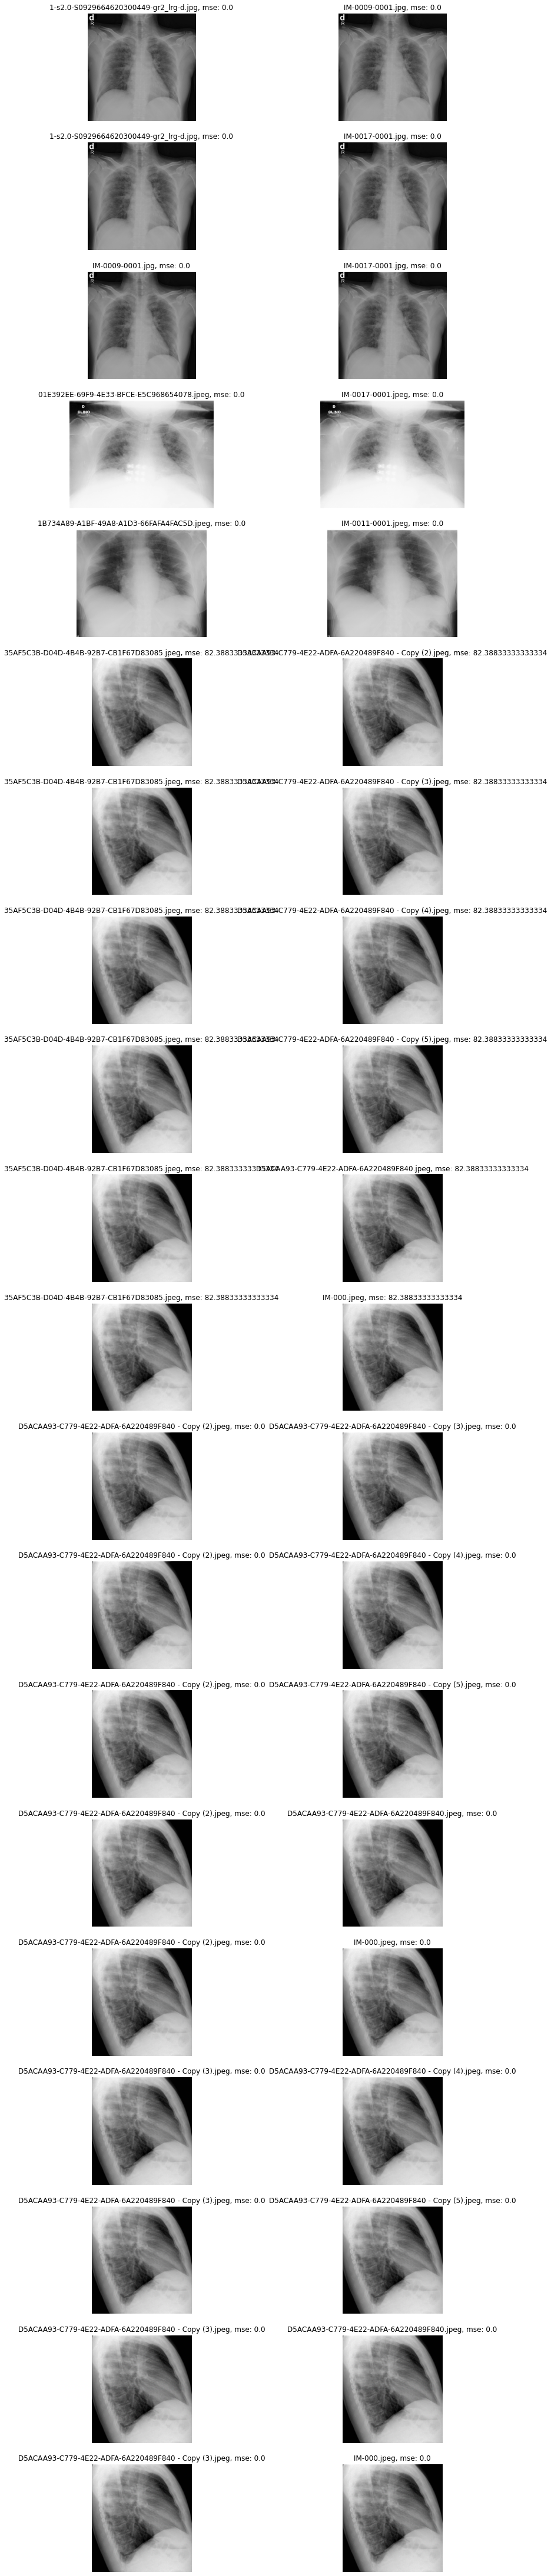

In [14]:
# let's take a closer look at duplicates in a different way
alt_found = cximg.show_close_images(origin_folder,60,190)

In [15]:
# let's look at a sample of upper part of images and see if there are outliers
lovereturned = cximg.find_by_sample_upper(origin_folder, 10, 200)

In [16]:
# show images where the top is 'too white'
wierd_images = lovereturned[lovereturned['where'] != 'less']


In [17]:
wierd_images_list = wierd_images.images.to_list()

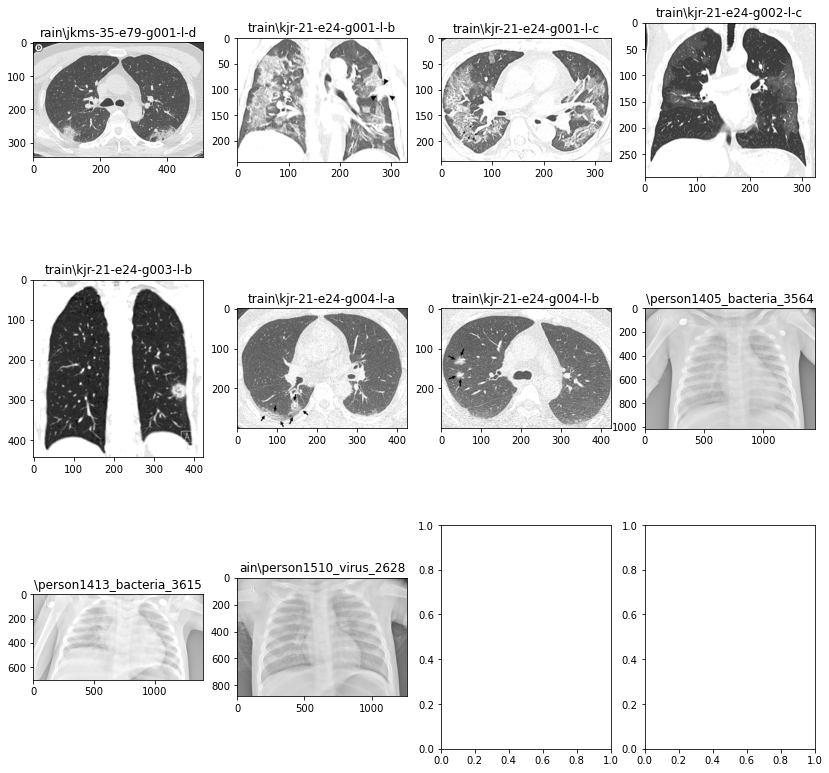

In [18]:
#show me some of those images
cximg.show_images_in_df(wierd_images_list, 25)


In [19]:
# uhoh, that shows that some of our images are not Xrays at all, 
#or have  been cut too low...or have maybe flouroscopy like shading, or , or , or


We can try another way of finding outliers and see what else we turn up.

In [20]:
lovereturned2 = cximg.find_sample_upper_greater_than_lower(origin_folder, 10)

In [21]:
lovereturned2

,images,estup,estdown,which_greater
0,Coronahack-Chest-XRay-Dataset/Coronahack-Chest...,101.680346,125.045776,upper less
1,Coronahack-Chest-XRay-Dataset/Coronahack-Chest...,28.851147,120.431382,upper less
2,Coronahack-Chest-XRay-Dataset/Coronahack-Chest...,29.117742,145.649713,upper less
3,Coronahack-Chest-XRay-Dataset/Coronahack-Chest...,26.556290,159.149889,upper less
4,Coronahack-Chest-XRay-Dataset/Coronahack-Chest...,41.446871,130.997767,upper less
...,...,...,...,...
5317,Coronahack-Chest-XRay-Dataset/Coronahack-Chest...,103.619680,133.834816,upper less
5318,Coronahack-Chest-XRay-Dataset/Coronahack-Chest...,120.486729,240.493498,upper less
5319,Coronahack-Chest-XRay-Dataset/Coronahack-Chest...,136.830584,244.468895,upper less
5320,Coronahack-Chest-XRay-Dataset/Coronahack-Chest...,126.421858,241.807298,upper less


In [22]:
lovereturned2[lovereturned2.which_greater == 'upper more']

,images,estup,estdown,which_greater
25,Coronahack-Chest-XRay-Dataset/Coronahack-Chest...,243.722432,240.737915,upper more
32,Coronahack-Chest-XRay-Dataset/Coronahack-Chest...,225.648549,220.032706,upper more
82,Coronahack-Chest-XRay-Dataset/Coronahack-Chest...,7.719889,7.090054,upper more
110,Coronahack-Chest-XRay-Dataset/Coronahack-Chest...,124.291553,122.358682,upper more
120,Coronahack-Chest-XRay-Dataset/Coronahack-Chest...,139.604674,136.260711,upper more
...,...,...,...,...
5250,Coronahack-Chest-XRay-Dataset/Coronahack-Chest...,144.710177,128.821009,upper more
5277,Coronahack-Chest-XRay-Dataset/Coronahack-Chest...,161.312157,158.227829,upper more
5302,Coronahack-Chest-XRay-Dataset/Coronahack-Chest...,134.631980,129.493802,upper more
5304,Coronahack-Chest-XRay-Dataset/Coronahack-Chest...,168.489240,156.251076,upper more


In [23]:
another_suspect_group = lovereturned2[lovereturned2.which_greater == 'upper more']
another_suspect_group_list = another_suspect_group.images.to_list()
another_suspect_group_list

['Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\\kjr-21-e24-g001-l-c.jpg',
 'Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\\kjr-21-e24-g004-l-b.jpg',
 'Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\\F2DE909F-E19C-4900-92F5-8F435B031AC6.jpeg',
 'Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\\IM-0133-0001.jpeg',
 'Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\\IM-0152-0001.jpeg',
 'Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\\IM-0199-0001.jpeg',
 'Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\\IM-0217-0001.jpeg',
 'Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\\IM-0229-0001.jpeg',
 'Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\\IM-0264-0001.jpeg',
 'Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\\IM-0265-0001.jpeg',
 'Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\\IM-03

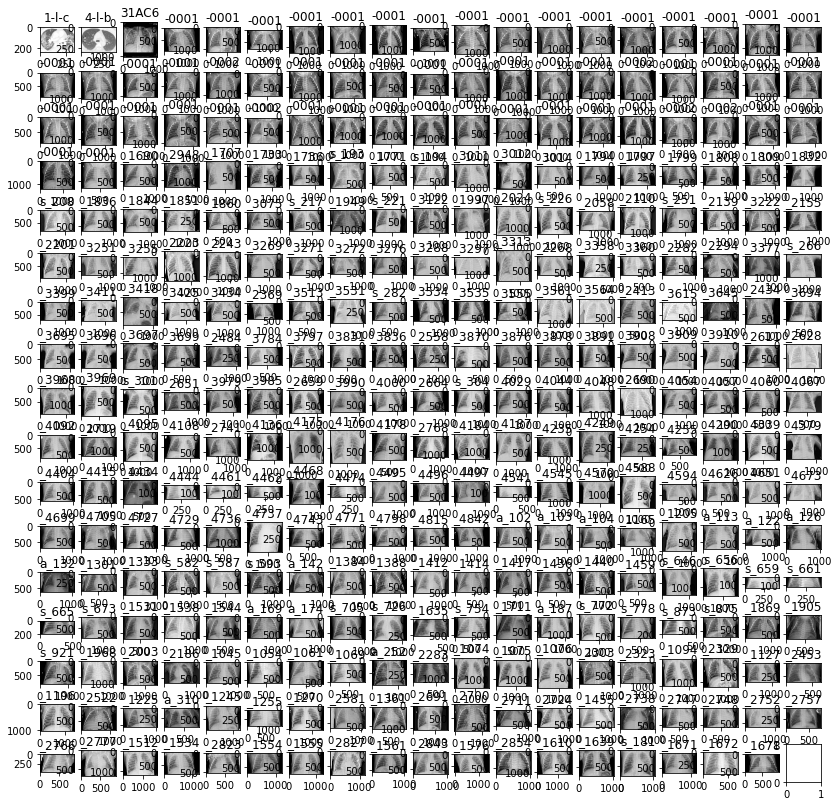

In [24]:
cximg.show_images_in_df(another_suspect_group_list, 5)

Too many to see well, let's look at only some.

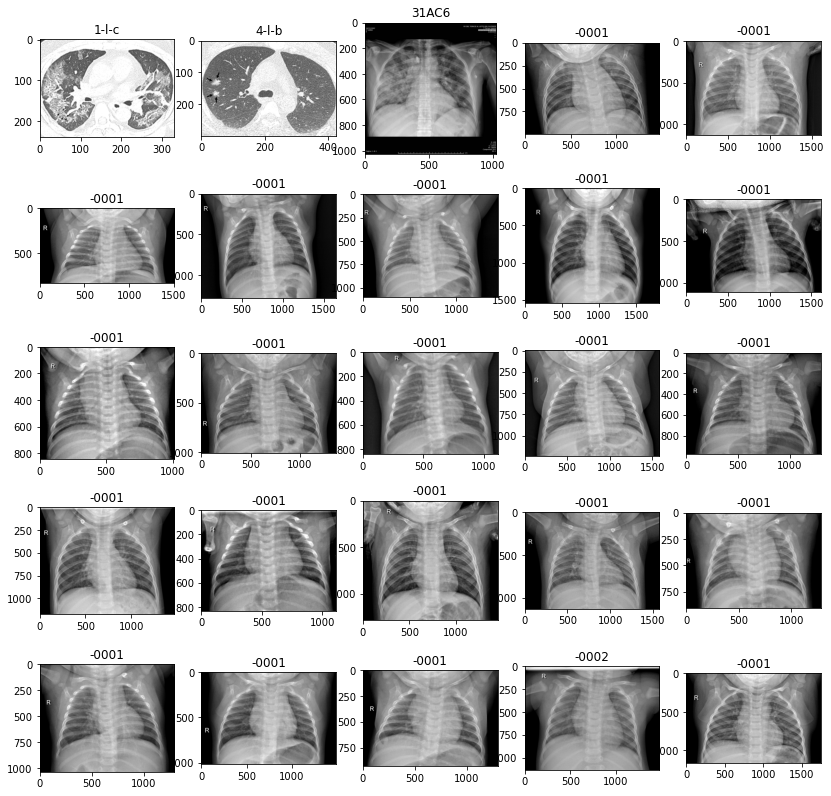

In [25]:
# let's look at a few of them
cximg.show_images_in_df(another_suspect_group_list[:25], 5)
# pull out images I do not want
# this may require a manual check on my lists generated

So we found mostly pediatric images with the patient hands up. Interesting. We probably would not want to make an algorithm for pediatric imaging and adult imaging all at once in the real world for various reasons. Anyways, we can move on to another function.

In [26]:
# OK, let's see where our shape is really off
tiny_image_different = cximg.find_tiny_image_differences(origin_folder, percentile=1)
one_percenters = tiny_image_different[tiny_image_different.results == 'mismatch']
one_percenters.images.to_list() 

['Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\\person1438_bacteria_3718.jpeg',
 'Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\\person1865_bacteria_4737.jpeg',
 'Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\\NORMAL2-IM-1275-0001.jpeg',
 'Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\\person1366_bacteria_3490.jpeg',
 'Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\\person279_bacteria_1316.jpeg',
 'Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\\person1436_bacteria_3711.jpeg',
 'Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\\person1389_bacteria_3531.jpeg',
 'Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\\person1111_bacteria_3052.jpeg',
 'Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\\SARS-10.1148rg.242035193-g04mr34g09b-Fig9b-day19.jpeg',
 'Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\\per

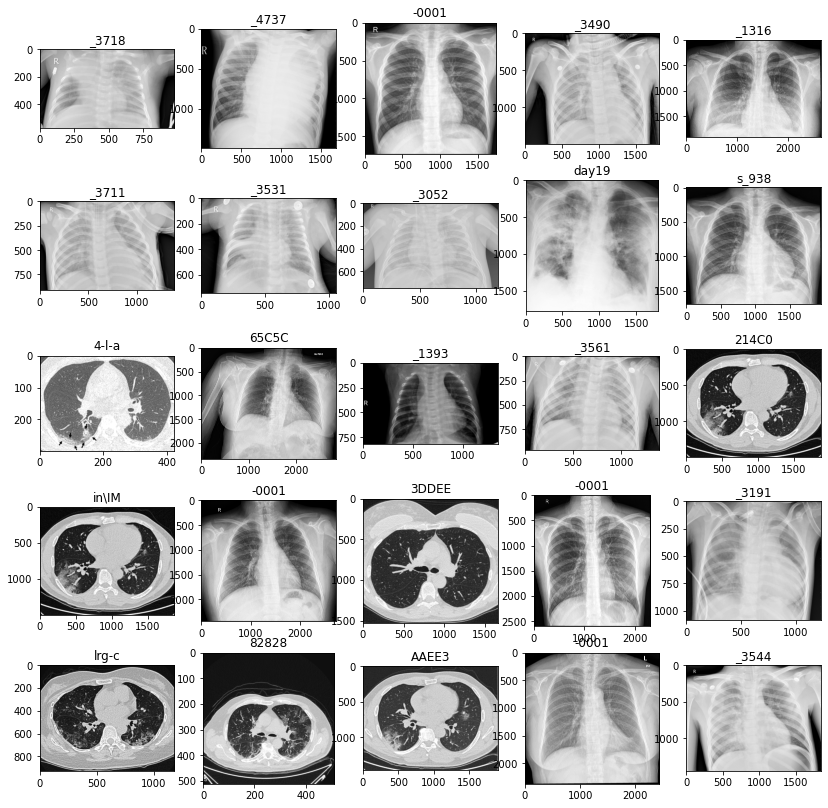

In [27]:
# let's look at some
one_percenters_list= one_percenters.images.to_list()
cximg.show_images_in_df(one_percenters_list[:25], 5)

In [28]:
# we should pick through these by hand, but let's just assume we want to throw them all away
not_one_percenters = tiny_image_different[tiny_image_different.results != 'mismatch']
not_one_percenters_list = not_one_percenters.images.to_list()
one_percenters_list = one_percenters.images.to_list()

In [29]:
# interestingly comparing the two sides was less specific 
#than just getting the ones with high values in the upper part
# so now we can pull thos high values in upper part ones out. 
not_wierd_images = lovereturned[lovereturned['where'] == 'less']
not_wierd_images_list = not_wierd_images.images.to_list()
good_images_list = set(not_wierd_images_list).intersection(not_one_percenters_list)
new_fine_list = []
for element in good_images_list:
    newel = element.replace('Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train\\', '')
    
    new_fine_list.append(newel)

In [30]:
better_trainer = example_train_csv[example_train_csv.X_ray_image_name.isin(new_fine_list)]

# now let's pick those up and throw them into a different folder wis the csv
# can call that folder 'refined'
# note: the data deposited will not be pushed to (rather removed from) my github to save space
refined = "refined"
if os.path.exists(refined):
    print("folder for this seems to exist")
else:    
    try:
        dir = os.path.join(refined)
        if not os.path.exists(dir):
            os.mkdir(dir)
    except OSError:
        print ("Creation of the directory %s failed" % refined)
    else:
        print ("Successfully created the directory %s " % refined)
        
#better_trainer.to_csv(os.path.join(refined,'better_trainer.csv'))        
path0 = os.path.join(refined,'better_trainer.csv')
path1 = path0.replace('\\','/')
path2 = path1.replace('//', '/')
better_trainer.to_csv(path2)

folder for this seems to exist


In [31]:
original_files1 = glob.glob(os.path.join(origin_folder, '*.jpg'))
original_files2 = glob.glob(os.path.join(origin_folder, '*.jpeg'))
original_files = original_files1  + original_files2
target = refined

# for f in original_files:
#     if f.isin() 
    #shutil.copy(f, target)
def copy_to(src):
    shutil.copy(os.path.join(origin_folder,src), target)
better_trainer.X_ray_image_name.apply(copy_to);    

In [32]:
# # ALTERNATIVE CODE BLOCK WITHOUT CLASSES FOR OLDER VERSIONS OF CLEANX:
# # OK, now let's assume we have a good train and test set, and start some exploratory data analysis
# # we want to do it on the real images, not the frames so first we will crop
# # note: the image data deposited will not be pushed to (rather removed from) my github to save space
# target_directory = 'resized_to_same_size2'
# cximg.crop_them_all(refined, target_directory)
# deflep = cximg.dimensions_to_df(target_directory)

Please note the function crop_them_all is depracated. Therefore in an updated notebook (as of January 2022) we would need to sneak in one class function to perform this action.


In [33]:
# here we will run on the images including frames, comment out this block 
#if you wish to copu the code but include a class or use an older version 
# target_directory = refined #?

In [34]:
deflep = cximg.dimensions_to_df(refined)

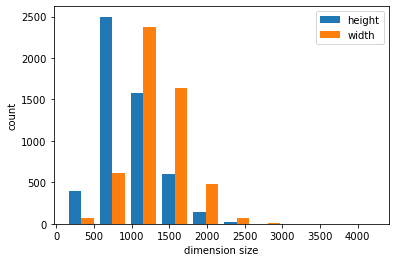

In [35]:
epa_dimensions = cximg.dimensions_to_histo(refined)

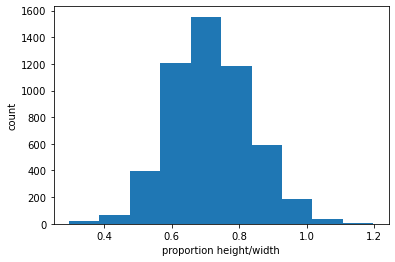

In [36]:
 epa_proportions = cximg.proportions_ht_wt_to_histo(refined, 10)

In [37]:
# well we can see we have a varied bunch of images. Let's make them all the most common size
# print("Most common height", depflex.height.mean())
# print("Most common width", depflex.width.mean())
print("Most common height", deflep.height.mean())
print("Most common width", deflep.width.mean())
print("Most common proportion", deflep.proportion.mean())
if deflep.proportion.mean() == (deflep.height.mean()/deflep.width.mean()):
    print(
        """Most common proportion is actually the most common height over width.\n 
        Parameters for resize are obvious"""
    )
else:
    print("""Most common proportion are not actually the most common height over width.\n 
        Parameters for resize are not obvious"""
    )    
# define ta directory to be created

# note: the data deposited will not be pushed to (rather removed from) my github to save space
pathy = "resized_to_same_size3"
if os.path.exists(pathy):
    print("folder for this seems to exist")
else:    
    try:
        dir = os.path.join(pathy)
        if not os.path.exists(dir):
            os.mkdir(dir)
    except OSError:
        print ("Creation of the directory %s failed" % pathy)
    else:
        print ("Successfully created the directory %s " % pathy)
    

Most common height 968.3376549094376
Most common width 1319.538608198284
Most common proportion 0.7161660410186886
Most common proportion are not actually the most common height over width.
 
        Parameters for resize are not obvious
folder for this seems to exist


In [38]:
original_files1 = glob.glob(os.path.join(origin_folder, '*.jpg'))
original_files2 = glob.glob(os.path.join(origin_folder, '*.jpeg'))
original_files = original_files1  + original_files2
# note: the data deposited will not be pushed to (rather removed from) my github to save space
target = 'resized_to_same_size3'

for f in original_files:
    shutil.copy(f, target)

In [39]:
# warning - this operation may take a relatively long time depending on number
#%%time
#of images - coffee break time!
# note: the data deposited will not be pushed to (rather removed from) my github to save space
# NOTE: here a PIL function snuck in, this could also have been written with cv2
g = 'resized_to_same_size3'
count = 0
for file in os.listdir(g):
    f_img = g+"/"+file
    img = Image.open(f_img)
    img = img.resize((1388, 992))
    img.save(f_img)
    count += 1

In [40]:
# find hazy images, see how many and how bad 
found = cximg.find_very_hazy(g)
percent_blurry = ((len(found[found.label_for_haze == 'hazy']))/count)
# If this is less than 2% of images I will just ignore
if percent_blurry*100 > 2:
    print("You have",
          percent_blurry*100,
          "percent images suspect for blurryness. Examine with found[found.label_for_haze == 'hazy']" 
    )
else:
    print ("You have",
        percent_blurry*100,
        "percent images suspect for blurryness. Less than 2% is probably good"
    )

You have 5.3916964117978585 percent images suspect for blurryness. Examine with found[found.label_for_haze == 'hazy']


In [41]:
# I just dont' care about blurry images today...but we could have pulled them
# let's make an average image of all (jpeg) trains from our original data
# note: the data deposited will not be pushed to (rather removed from) my github to save space
train_image_directory = 'resized_to_same_size3'
#lotus = cx.avg_image(example_train_csv,'X_ray_image_name', 'Label',g)
lotus = cximg.avg_image_maker((glob.glob(os.path.join(train_image_directory, '*.jpeg'))))


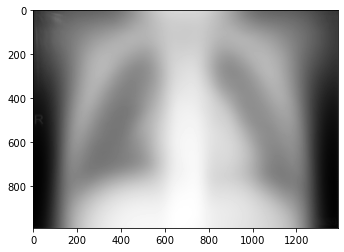

In [42]:
plt.imshow(lotus, cmap = 'gray')

In [43]:
example_train_csv

,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category,gender
0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN,Male
1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN,Female
2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN,Female
3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN,Male
4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN,Female
...,...,...,...,...,...,...
5281,1-s2.0-S0929664620300449-gr2_lrg-c.jpg,Pnemonia,TRAIN,COVID-19,Virus,Male
5282,1-s2.0-S0929664620300449-gr2_lrg-b.jpg,Pnemonia,TRAIN,COVID-19,Virus,Female
5283,1-s2.0-S0929664620300449-gr2_lrg-a.jpg,Pnemonia,TRAIN,COVID-19,Virus,Female
5284,1-s2.0-S0140673620303706-fx1_lrg.jpg,Pnemonia,TRAIN,COVID-19,Virus,Male


In [44]:
# lets make averages of pathological versus non-path, or whatever our labels are
# this is another coffee break
lotus2 = cximg.avg_image_maker_by_label(example_train_csv,'X_ray_image_name', 'Label',origin_folder)
lotus2

,name,images
0,Normal,"[[14311.0, 16108.0625, 16382.875, 16384.4375, ..."
1,Pnemonia,"[[14600.5625, 16367.375, 16371.5625, 16469.25,..."


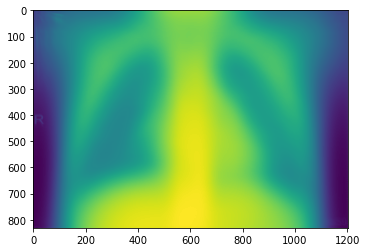

In [45]:
one = lotus2.images[1]
plt.imshow(one)

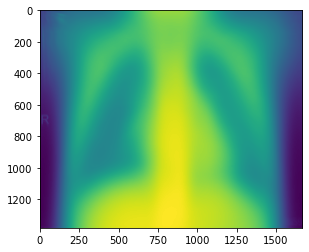

In [46]:
two = lotus2.images[0]
plt.imshow(two)

OK, we can observe that in our original folder, the pathological images tended to 
be X-rayed with different proportions, but shall we compare apples to apples, and see if there is much difference image to image?

diff image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small ima

example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_

example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_

example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_

example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_

example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_

example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_

example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_

example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_

example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_

example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_

example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_

example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_

example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_

example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_

example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_

example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_

example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_

example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_

example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_

example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_small image (992, 1388)
example_

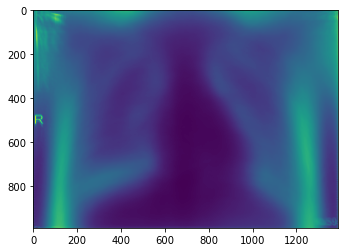

In [47]:
#OK, we can observe that in our original folder, the pathological images tended to 
#be X-rayed with
# different proportions, but shall we compare apples to apples, and see if there is much 
#difference image to image?
all_apples = cximg.set_image_variability(glob.glob(os.path.join(train_image_directory, '*.jpeg')))
plt.imshow(all_apples);

OK, hardly surprising we vary most  on where the big 'edges' are and in the lungs
I guess they didn't tape the patients to exactly the same position down to the centimeter.
I wonder if we have images with text (may take a long time )

In [48]:
text_question = cximg.tesseract_specific(train_image_directory)
text_question

,images,text,clean_text
0,resized_to_same_size3\1-s2.0-S0140673620303706...,\n\n \n,
1,resized_to_same_size3\1-s2.0-S0929664620300449...,\n,
2,resized_to_same_size3\1-s2.0-S0929664620300449...,\n,
3,resized_to_same_size3\1-s2.0-S0929664620300449...,\n\n \n\n \n,
4,resized_to_same_size3\1-s2.0-S0929664620300449...,\n,
...,...,...,...
5318,resized_to_same_size3\person9_bacteria_41.jpeg,\n,
5319,resized_to_same_size3\SARS-10.1148rg.242035193...,\n,
5320,resized_to_same_size3\SARS-10.1148rg.242035193...,\n,
5321,resized_to_same_size3\SARS-10.1148rg.242035193...,\n,


In [49]:
text_question.clean_text.unique()

array(['', 'MOBILE\nSUPINE', '<= AP. MOBIL\n\nae\n.', 'AP ERECT MOBILE',
       'a Ca) ee De ee ee', '_ SEDUTO', 'ORTOSTASI\n\n \n\nPA',
       'RX DEL TORACE AL LETTO DEL PAZIENTE\nce yREYptyy 7 Orel\n57 ANNO 05/03/2020 14:30:41\nTa . 11872156\n\nPagina: 1 di 1',
       'A LETTO',
       'RX TORACE\nLATERALE\n\n29/02/2020, 01:36 oot\n\nLoc:\n\nfeller\nNo eect\n\nPage: 1 of 1',
       'SUPINO', 'AP EREC', 're)', 'SORE]\n\n \n\nEy', 'AP Seduto',
       'D SUP ns ‘|', 'OnE Co] errr\now\n\n0 Coa\nEy ee ———=—',
       'RX TORACE\nTal Leen\n\nLeh A0e) piey sera ‘0\n\n    \n\nPage: 1 of 1',
       'DEL TORACE AL LETTO DEL PAZIENTE\ncpr pL Led Bate ats\n57 ANNO.\n\ni\n\nw: 38800\nlot eee}\nfT Cea ee rae',
       'laa bad 1\n\n \n\n \n\nco il oncoeereeeeenneennrstireceeeeenEEEEEEEEREERe\n\nrae ie)',
       'Le Eke) tea\nLata\n\n29/02/2020, 01:35 ry\n\n00000\nVGDR7501\npfs\n\nrans se\n\nLoree]\n\nWw: 4096\n\nPage: 1 of 2 Bi rae',
       'PR', 'fegt', 'Be\n\nli\n\nes', 'Ss\npo', 'GE hi',
       

There was some text, 
i.e. "'RX DEL TORACE AL LETTO DEL PAZIENTE"
but not text that said pneumonia, or COVID, or another diagnosis we would be concerned with
if our goal was to use the dataset to make an algorithm to find COVID-19 images.
We can also make augmented images.

## Normalizing and Augmenting images

We have several functions for augmenting images. These include but are not limited to:
     subtle_sharpie_enhance
     salting
     simple_rotation_augmentation
     blur_out_edges
These functions are in the image_functions.py file. Feel free to ask for a different one in disucssions (https://github.com/drcandacemakedamoore/cleanX/discussions). 
 

We have histogram based normalization- but it is easier to use with classes. Check out our other workflow "classes_workflow" to see it in action.

## Showing or "watermarking" environment: I include my packages here:

Below are two blocks you may want to run if you have the makedalytics or watermark libraries to expose the environent you are in.

In [50]:
# ##To expose user environment, use watermark or get makedalytics, uncomment and run:
# import makedalytics as ma
# ma.packages_to()

In [52]:
# import watermark
# %load_ext watermark
# %watermark -v -m -p cleanX,SimpleITK,numpy,matplotlib,pandas,cv2,glob,os,shutil,PIL



You can learn more about cleanX's other functions in the other notebooks [here](https://github.com/drcandacemakedamoore/cleanX/blob/main/workflow_demo/bias_not.ipynb) and [here](https://github.com/drcandacemakedamoore/cleanX/blob/main/workflow_demo/classes_workflow.ipynb).